In [2]:
# EDA (Exploratory Data Analysis) 탐색적 데이터 분석
# 1. EDA란?
# 1) 정의
# 수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정입니다. 한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정입니다.

# 2) 필요한 이유
# 데이터의 분포 및 값을 검토함으로써 데이터가 표현하는 현상을 더 잘 이해하고, 데이터에 대한 잠재적인 문제를 발견할 수 있습니다. 이를 통해, 본격적인 분석에 들어가기에 앞서 데이터의 수집을 결정할 수 있습니다.
# 다양한 각도에서 살펴보는 과정을 통해 문제 정의 단계에서 미쳐 발생하지 못했을 다양한 패턴을 발견하고, 이를 바탕으로 기존의 가설을 수정하거나 새로운 가설을 세울 수 있습니다.

# 3) 과정
# 기본적인 출발점은 문제 정의 단계에서 세웠던 연구 질문과 가설을 바탕으로 분석 계획을 세우는 것입니다. 분석 계획에는 어떤 속성 및 속성 간의 관계를 집중적으로 관찰해야 할지, 이를 위한 최적의 방법은 무엇인지가 포함되어야 합니다. 

# 분석의 목적과 변수가 무엇이 있는지 확인. 개별 변수의 이름이나 설명을 가지는지 확인
# 데이터를 전체적으로 살펴보기 : 데이터에 문제가 없는지 확인. head나 tail부분을 확인, 추가적으로 다양한 탐색(이상치, 결측치 등을 확인하는 과정)
# 데이터의 개별 속성값을 관찰 : 각 속성 값이 예측한 범위와 분포를 갖는지 확인. 만약 그렇지 않다면, 이유가 무엇인지를 확인. 
# 속성 간의 관계에 초점을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견 (상관관계, 시각화 등)




In [3]:
# 2. 이상값을 찾아내는 부분
# 데이터에 이상치가 있으면, 이상치가 왜 발생했는지 의미를 파악하는 것이 중요합니다. 
# 그리고 그러한 의미를 파악했으면 어떻게 대처해야 할지(제거, 대체, 유지 등)를 판단해야 합니다. 이상치를 발견하는 기법은 여러 가지가 있고 대표적으로 아래와 같은 방법들이 있습니다. 

In [66]:
# 1) 개별 데이터 관찰
# 데이터값을 눈으로 쭉 훑어보면서 전체적인 추세와 특이사항을 관찰할 수 있습니다. 
# 데이터가 많다고 앞부분만 보면 안 되고, 인덱스에 따른 패턴이 나타날 수도 있으므로 앞, 뒤 or 무작위로 표본을 추출해서 관찰해야 합니다. 단, 이상치들은 작은 크기의 표본에 나타나지 않을 수 있습니다. 

# 우리는 이번 예제에서 야후파이넨스의 API를 이용하여 데이터를 가져오며, 테슬라와 페이스북(META) 두개의 주식 데이터로 테스트 할 것입니다. 
# install the yfinance package
!pip install yfinance
# Extract yahoofinance data
import yfinance as yf
# 데이터 불러오기
df = yf.download(['TSLA', 'META'], start='2018-01-01', end='2019-12-31')
# Closing price
df = df['Close']
# 가장 앞 시점의 데이터 확인하기
df.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  2 of 2 completed


,META,TSLA
Date,,
2018-01-02,181.419998,21.368668
2018-01-03,184.669998,21.150000
2018-01-04,184.330002,20.974667
2018-01-05,186.850006,21.105333
2018-01-08,188.279999,22.427334


In [67]:
# 가장 뒷 시점의 데이터 확인하기
df.tail()

,META,TSLA
Date,,
2019-12-23,206.179993,27.948000
2019-12-24,205.119995,28.350000
2019-12-26,207.789993,28.729334
2019-12-27,208.100006,28.691999
2019-12-30,204.410004,27.646667


In [68]:
# 각 컬럼 확인하기
print(df.columns)

Index(['META', 'TSLA'], dtype='object')


In [69]:
#데이터 요약정보 확인하기


# info()함수 : 데이터 프레임의 모든 기본 정보(타입, 행열크기, 타입, 메모리 등)를 보여준다.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2018-01-02 to 2019-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   META    502 non-null    float64
 1   TSLA    502 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


In [70]:
#shape 함수: 데이터의 행과 열을 보여준다.
df.shape

(502, 2)

In [71]:
#dtypes 함수
df.dtypes

META    float64
TSLA    float64
dtype: object

In [13]:
# 2) 통계 값 활용
# 적절한 요약 통계 지표(summary statistics)를 사용할 수 있습니다. 데이터의 중심을 알기 위해서는 평균(mean), 중앙값(median), 최빈값(mode)을 사용할 수 있고 데이터의 분산을 알기 위해 범위(range), 분산(variance)을 사용할 수 있습니다. 
# 통계 지표를 이용할 때는 데이터의 특성에 주의해야 합니다. 
# 예를 들어, 평균에는 집합 내 모든 데이터 값이 반영되기 때문에, 이상치가 있으면 값이 영향을 받지만, 중앙값에는 가운데 위치한 값 하나가 사용되기 때문에 이상치의 존재에도 대표성이 있는 결과를 얻을 수 있습니다.
# 흔한 예시로, 회사 직원들의 연봉에 대해서 평균을 구하면, 대개 중간값보다 훨씬 높게 나오는데, 그것은 몇몇 고액 연봉자가 평균을 끌어올릴 수 있다는 생각을 해보세요.


In [72]:
# describe()함수 : 기초통계량
#총 데이터 수(count),mean, 표준편차(std), 분위수(25,50,75%), max,min
# 여기서 50%가 median인건 당연하다.
df.describe()

,META,TSLA
count,502.000000,502.000000
mean,176.527191,19.675441
std,18.770594,3.178052
min,124.059998,11.931333
25%,164.845001,17.187167
50%,179.995003,20.000000
75%,189.474998,22.263000
max,217.500000,28.729334


In [73]:
#  count()함수: 데이터 개수 확인
# 데이터의 열마다 개수를 시리즈 형태로 반환한다.
df.count()

META    502
TSLA    502
dtype: int64

In [74]:
# 당신이 특정 의도로 어떤 기초통계 값만 뽑아서 사용하고 싶을때는 다음과 같이 개별로 함수를 사용하여 계산할수도 있다.
# 평균
df.mean() # 데이터프레임에 전체에 적용


META    176.527191
TSLA     19.675441
dtype: float64

In [75]:
# 평균(개별 컬럼에 대해서 적용)
print(df['META'].mean() )

176.52719079735743


In [76]:
# 중앙값
print(df.median())

META    179.995003
TSLA     20.000000
dtype: float64


In [77]:
# 최대, 최소
print(df.max())
print(df.min())

META    217.500000
TSLA     28.729334
dtype: float64
META    124.059998
TSLA     11.931333
dtype: float64


In [78]:
# 표준편차
print(df.std())

META    18.770594
TSLA     3.178052
dtype: float64


In [79]:
# corr()함수: 상관계수
# 상관관계는 두 변수간의 상관성에 대한 정보로 -1~1사이의 값을 갖는다.
#이는 선형성가정 등을 고려해야할 필요가 있지만, EDA과정에서 한번 볼 필요는 있다.
#corr()함수는 문자열을 제외한 변수간 매트릭스를 생성하고 각 쌍들의 상관계수를 반환한다.

df.corr()

,META,TSLA
META,1.000000,-0.113521
TSLA,-0.113521,1.000000


In [59]:
# 3) 시각화 활용
# 일단은 시각적으로 표현이 되어있는 것을 보면, 분석에 도움이 많이 됩니다. 시각화를 통해 주어진 데이터의 개별 속성에 어떤 통계 지표가 적절한지 결정할 수 있습니다. 
# 시각화 방법에는 확률밀도 함수, 히스토그램, 점 플롯(dotplot), 워드 클라우드, 시계열 차트, 지도 등이 있습니다.
# 주로 Pandas에 내장된 시각화 도구를 이용하여 데이터를 관찰하게 됩니다.

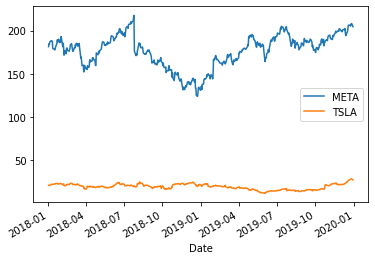

In [81]:
df.plot()

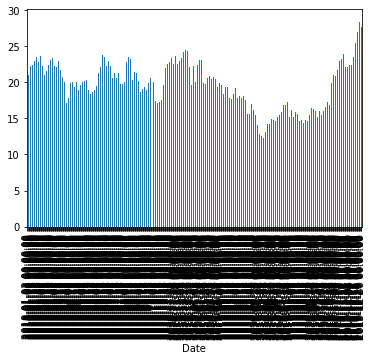

In [94]:
df['TSLA'].plot(kind='bar')

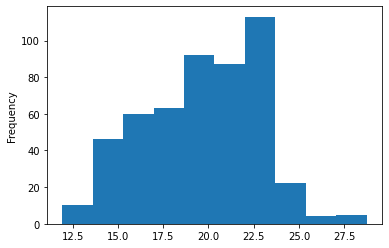

In [84]:

df['TSLA'].plot(kind='hist')

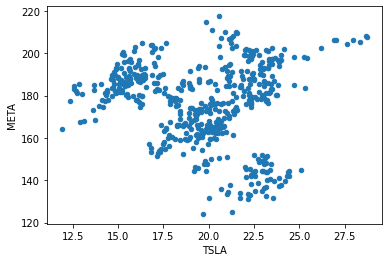

In [87]:
# 산점도
df.plot(x = 'TSLA', y = 'META',kind='scatter')

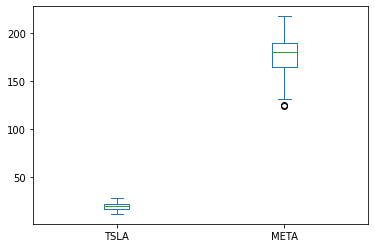

In [90]:
# 박스플롯
# 박스플롯은 이상치 제외 최소값, 1분위수, 중앙값, 3분위수, 이상치 제외 최대값, 이상치 를 제공한다.
df[['TSLA','META']].plot(kind='box')

In [89]:

# 4) 머신러닝 기법 활용
# 대표적인 머신러닝 기법으로 K-means를 통해 이상치를 확인 할 수 있습니다. 


# 5) 그 외에 이상치 발견 기법으로 Statistical-based Detection, Deviation-based Method,Distance-based Detection 등 이 있다.